## Rainfall Prediction over Michigan Lake using CNN and RNN
---------------------------------------
<div align="right">
    <b>Teammates:</b><br>
    Krishnakanth Naik Jarapala<br>
    Uday Kiran Dasari
</iv>


In the current Notebook we did a comprehensive data preprocessing and finally saved the clean and filtered data.
- Load and Read Full data ==> Complete EDA ==> Feature Engineering ==> Considering the 10,000 records of recent data ==> Image preprocessing, Resize, Maks ==> Classify the label into 3 classes: **No-Rain / Medium Rain / High-Rain**

## Necessary Import

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import ast

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

## Preprocessing

### Load the Dataset

In [2]:
full_data = pd.read_csv(r'../../artifacts/data/2006Fall_2017Spring_GOES_meteo_combined.csv')
full_data = full_data.sort_values(['Date_UTC', 'Time_UTC'], ascending=[True, True]).reset_index(drop=True)


# Combine date and time columns into a single datetime column
full_data['datetime'] = pd.to_datetime(full_data['Date_UTC'] + ' ' + full_data['Time_UTC'])
full_data['year_month'] = full_data['datetime'].dt.strftime('%Y-%m')

full_data.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust(mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F),datetime,year_month
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,44,7,150,m,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC,2006-10-01 00:00:00,2006-10
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,44,8,150,m,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC,2006-10-01 01:00:00,2006-10
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,44,6,M,m,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC,2006-10-01 02:00:00,2006-10
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,44,8,150,m,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC,2006-10-01 03:00:00,2006-10
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,45,5,M,m,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC,2006-10-01 04:00:00,2006-10


**Checking Number of Records per month.**

In [3]:
zz_df = full_data.sort_values(['datetime']).reset_index(drop=True)
zzzz = pd.DataFrame(zz_df.year_month.value_counts()).reset_index()
zzzz = zzzz.sort_values(['year_month']).reset_index(drop=True)
zzzz.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
year_month,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03
count,744,720,744,744,672,744,744,720,744,744,696,745,744,720,744,744,672,744,744,720,744,744,672,744,744,720,744,744,672,744,744,720,744,744,696,744,744,720,744,744,672,744,744,720,744,744,672,744,744,720,744,744,672,744,744,720,744,744,696,744,744,720,744,744,672,744


**Observation:** Looking at the complete data, we have **6 months of continuous data for every year**, from 10th month to 3rd month of next year.

Calculate the Missing Data by year-month along with **['m','M','NC']** values

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
# Convert year_month column to datetime type
full_data['year_month'] = pd.to_datetime(full_data['year_month'])

# Group by year_month and calculate percentage of missing values for each feature
missing_percentage = full_data.groupby(full_data['year_month'].dt.to_period('M')).apply(lambda x: np.round((x.isin(['M', 'm', 'NC']) | x.isnull()).mean() * 100, 2))

missing_percentage

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust(mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F),datetime,year_month
year_month,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-10,0.0,0.0,0.0,0.0,4.44,4.44,0.0,0.0,0.00,0.00,0.00,0.00,13.58,86.42,0.27,64.25,88.04,0.27,0.00,6.59,0.00,6.05,58.60,100.00,0.0,0.0
2006-11,0.0,0.0,0.0,0.0,0.42,0.42,0.0,0.0,0.00,0.00,0.00,0.00,16.94,88.47,0.00,70.56,92.92,0.56,0.00,7.64,0.00,6.94,47.50,100.00,0.0,0.0
2006-12,0.0,0.0,0.0,0.0,0.54,0.54,0.0,0.0,0.00,0.00,0.00,0.27,16.26,83.60,0.00,74.60,94.22,1.34,0.00,8.20,0.13,6.32,17.20,100.00,0.0,0.0
2007-01,0.0,0.0,0.0,0.0,0.27,0.27,0.0,0.0,0.00,0.00,0.00,0.40,12.50,87.50,0.00,64.25,89.38,0.40,0.00,10.35,0.00,8.60,19.49,100.00,0.0,0.0
2007-02,0.0,0.0,0.0,0.0,0.60,0.60,0.0,0.0,0.00,0.00,0.00,0.30,4.46,83.93,0.00,56.99,86.31,1.79,0.00,13.10,0.00,11.16,19.79,100.00,0.0,0.0
2007-03,0.0,0.0,0.0,0.0,10.62,10.62,0.0,0.0,0.00,0.00,0.00,0.00,10.22,79.84,0.54,77.55,93.15,0.27,0.00,7.93,0.00,6.59,37.50,100.00,0.0,0.0
2007-10,0.0,0.0,0.0,0.0,4.70,4.70,0.0,0.0,0.00,0.00,0.00,0.00,10.35,75.40,0.00,65.59,88.04,0.00,0.00,3.90,0.00,3.49,84.81,96.24,0.0,0.0
2007-11,0.0,0.0,0.0,0.0,0.14,0.14,0.0,0.0,0.00,0.00,0.00,0.00,10.42,76.11,0.28,63.47,91.25,0.14,0.00,5.42,0.00,4.31,40.83,100.00,0.0,0.0
2007-12,0.0,0.0,0.0,0.0,0.27,0.27,0.0,0.0,0.00,0.00,0.00,0.27,9.41,82.93,0.27,72.45,93.15,1.75,2.02,7.53,0.00,7.80,35.62,100.00,0.0,0.0


**Observation: Cloud Data Missing more than ~30% for months: 2010-10 till 2011-11**

In [6]:
missing_percentage[missing_percentage.File_name_for_1D_lake > 30]

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust(mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F),datetime,year_month
year_month,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10,0.0,0.0,0.0,0.0,38.84,38.84,0.0,0.0,1.21,1.21,1.21,1.08,6.45,82.26,0.13,56.32,83.20,1.08,0.00,4.03,0.0,2.82,77.82,100.00,0.0,0.0
2010-11,0.0,0.0,0.0,0.0,33.33,33.33,0.0,0.0,0.28,0.28,0.28,0.14,11.81,75.97,1.81,55.00,83.47,0.00,0.14,2.64,0.0,2.36,38.19,100.00,0.0,0.0
2010-12,0.0,0.0,0.0,0.0,33.33,33.33,0.0,0.0,0.13,0.13,0.00,0.67,6.72,74.60,0.13,54.17,87.37,1.48,0.00,7.53,0.0,6.32,22.31,100.00,0.0,0.0
2011-01,0.0,0.0,0.0,0.0,33.74,33.74,0.0,0.0,0.13,0.13,0.13,0.00,6.85,87.10,0.00,48.39,86.96,0.40,0.00,8.87,0.0,6.99,34.95,100.00,0.0,0.0
2011-02,0.0,0.0,0.0,0.0,35.27,35.27,0.0,0.0,0.00,0.00,0.00,0.00,6.55,70.39,0.00,51.34,88.99,0.00,0.00,6.55,0.0,5.36,25.00,100.00,0.0,0.0
2011-03,0.0,0.0,0.0,0.0,38.04,38.04,0.0,0.0,0.00,0.00,0.00,0.13,5.51,82.39,1.61,62.37,93.55,0.81,0.00,2.96,0.0,2.55,33.74,100.00,0.0,0.0
2011-10,0.0,0.0,0.0,0.0,39.65,39.65,0.0,0.0,0.00,0.00,0.00,0.00,7.66,81.45,0.00,57.53,83.06,0.00,0.00,2.82,0.0,2.28,77.55,98.52,0.0,0.0
2011-11,0.0,0.0,0.0,0.0,33.33,33.33,0.0,0.0,0.00,0.00,0.00,0.00,12.22,79.72,0.28,54.44,85.14,0.14,0.00,5.83,0.0,5.42,50.42,100.00,0.0,0.0


### Data Filtering
***Considering the very recent data - from [2014-10 till 2017-03] as the data quality is better***

In [7]:
full_data[full_data.year_month >= '2014-10'].year_month.unique(), full_data[full_data.year_month >= '2014-10'].shape

(<DatetimeArray>
 ['2014-10-01 00:00:00', '2014-11-01 00:00:00', '2014-12-01 00:00:00',
  '2015-01-01 00:00:00', '2015-02-01 00:00:00', '2015-03-01 00:00:00',
  '2015-10-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00',
  '2016-01-01 00:00:00', '2016-02-01 00:00:00', '2016-03-01 00:00:00',
  '2016-10-01 00:00:00', '2016-11-01 00:00:00', '2016-12-01 00:00:00',
  '2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00']
 Length: 18, dtype: datetime64[ns],
 (13128, 26))

#### Read and use the data from year-month: **2014 -10 --- 2017-03**

In [8]:
les = full_data[full_data.year_month >= '2014-10'].sort_values('datetime').reset_index(drop=True)
les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust(mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F),datetime,year_month
0,2014-10-01,00:00,2014-09-30,00:00,goes15.2014.10.01.0000.v01.nc-var1-t0.csv,T_goes15.2014.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0025, 0.0025, 0.0025, 0.005, 0.0025, 0.0, 0...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,93.0,46.0,11,330,m,800,m,m,4,992.70,M,1015.60,0.05,43,NC,2014-10-01 00:00:00,2014-10-01
1,2014-10-01,01:00,2014-09-30,01:00,goes15.2014.10.01.0100.v01.nc-var1-t0.csv,T_goes15.2014.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0, 0.0, nan, nan, nan, 0.0025, nan, 0.0, 0....","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,93.0,46.0,9,340,m,800,m,m,4,993.30,M,1016.30,m,44,NC,2014-10-01 01:00:00,2014-10-01
2,2014-10-01,02:00,2014-09-30,02:00,goes15.2014.10.01.0200.v01.nc-var1-t0.csv,T_goes15.2014.10.01.0200.v01.nc-var1-t0.csv.csv,"[nan, nan, 0.0, 0.0025, 0.005, 0.0, nan, nan, ...","[array([ nan, nan, nan, nan, nan, n...",49.0,89.0,46.0,8,360,m,600,1000,m,6,993.00,1016.00,1015.90,0.04,NC,NC,2014-10-01 02:00:00,2014-10-01
3,2014-10-01,03:00,2014-09-30,03:00,goes15.2014.10.01.0300.v01.nc-var1-t0.csv,T_goes15.2014.10.01.0300.v01.nc-var1-t0.csv.csv,"[nan, 0.0, nan, nan, nan, nan, 0.005, 0.0025, ...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,87.0,45.0,10,30,m,1200,1700,m,8,993.00,M,1015.90,0.01,44,NC,2014-10-01 03:00:00,2014-10-01
4,2014-10-01,04:00,2014-09-30,04:00,goes15.2014.10.01.0400.v01.nc-var1-t0.csv,T_goes15.2014.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, nan, 0.0, nan, 0.0,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,86.0,44.0,8,50,m,1000,1500,m,10,993.70,1016.80,1016.60,0.00,44,NC,2014-10-01 04:00:00,2014-10-01


In [9]:
zz = pd.DataFrame(les.year_month.value_counts())
zz.reset_index(inplace=True)

zz.sort_values(['year_month']).reset_index(drop=True)

,year_month,count
0,2014-10-01,744
1,2014-11-01,720
2,2014-12-01,744
3,2015-01-01,744
4,2015-02-01,672
5,2015-03-01,744
6,2015-10-01,744
7,2015-11-01,720
8,2015-12-01,744
9,2016-01-01,744


In [10]:
# Rename the columns
les.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,Wind_Chill_F,Heat_Index_F,datetime,year_month
0,2014-10-01,00:00,2014-09-30,00:00,goes15.2014.10.01.0000.v01.nc-var1-t0.csv,T_goes15.2014.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0025, 0.0025, 0.0025, 0.005, 0.0025, 0.0, 0...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,93.0,46.0,11,330,m,800,m,m,4,992.70,M,1015.60,0.05,43,NC,2014-10-01 00:00:00,2014-10-01
1,2014-10-01,01:00,2014-09-30,01:00,goes15.2014.10.01.0100.v01.nc-var1-t0.csv,T_goes15.2014.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0, 0.0, nan, nan, nan, 0.0025, nan, 0.0, 0....","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,93.0,46.0,9,340,m,800,m,m,4,993.30,M,1016.30,m,44,NC,2014-10-01 01:00:00,2014-10-01
2,2014-10-01,02:00,2014-09-30,02:00,goes15.2014.10.01.0200.v01.nc-var1-t0.csv,T_goes15.2014.10.01.0200.v01.nc-var1-t0.csv.csv,"[nan, nan, 0.0, 0.0025, 0.005, 0.0, nan, nan, ...","[array([ nan, nan, nan, nan, nan, n...",49.0,89.0,46.0,8,360,m,600,1000,m,6,993.00,1016.00,1015.90,0.04,NC,NC,2014-10-01 02:00:00,2014-10-01
3,2014-10-01,03:00,2014-09-30,03:00,goes15.2014.10.01.0300.v01.nc-var1-t0.csv,T_goes15.2014.10.01.0300.v01.nc-var1-t0.csv.csv,"[nan, 0.0, nan, nan, nan, nan, 0.005, 0.0025, ...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,87.0,45.0,10,30,m,1200,1700,m,8,993.00,M,1015.90,0.01,44,NC,2014-10-01 03:00:00,2014-10-01
4,2014-10-01,04:00,2014-09-30,04:00,goes15.2014.10.01.0400.v01.nc-var1-t0.csv,T_goes15.2014.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, nan, 0.0, nan, 0.0,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,86.0,44.0,8,50,m,1000,1500,m,10,993.70,1016.80,1016.60,0.00,44,NC,2014-10-01 04:00:00,2014-10-01


In [11]:
les.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13128 entries, 0 to 13127
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date_UTC               13128 non-null  object        
 1   Time_UTC               13128 non-null  object        
 2   Date_CST               13128 non-null  object        
 3   Time_CST               13128 non-null  object        
 4   File_name_for_1D_lake  13019 non-null  object        
 5   File_name_for_2D_lake  13019 non-null  object        
 6   Lake_data_1D           13128 non-null  object        
 7   Lake_data_2D           13128 non-null  object        
 8   Temp_F                 13126 non-null  object        
 9   RH_pct                 13126 non-null  object        
 10  Dewpt_F                13126 non-null  object        
 11  Wind_Spd_mph           13126 non-null  object        
 12  Wind_Direction_deg     13126 non-null  object        
 13  P

#### Handling Missing values

* Most of the features showing NO missing values and dtype as object.
* Few missing values in File_name_for_1D_lake and File_name_for_2D_lake  

In [12]:
# Replace the missing filenames of 1D and 2D lake with null values in the Lake Data
les.loc[les.File_name_for_1D_lake.isnull(), 'Lake_data_1D'] = np.nan
les.loc[les.File_name_for_2D_lake.isnull(), 'Lake_data_2D'] = np.nan

##### Few of the features has some missing values imputed by **[M, m, NC]**, so lets check the missing data by each feature

In [13]:
# List of meteorological tabular data columns
tab_features = [
    'Temp_F', 'RH_pct', 'Dewpt_F', 'Wind_Spd_mph', 'Wind_Direction_deg', 'Peak_Wind_Gust_mph',
    'Low_Cloud_Ht_ft', 'Med_Cloud_Ht_ft', 'High_Cloud_Ht_ft', 'Visibility_mi', 
    'Atm_Press_hPa', 'Sea_Lev_Press_hPa', 'Altimeter_hPa', 'Precip_in', 'Wind_Chill_F', 'Heat_Index_F'
]

results = []

for column in tab_features:
    if column in les.columns:
        converted = pd.to_numeric(les[column], errors='coerce')
        total_count = les[column].count()
        perc_missing = np.round(100*(converted.isna().sum()/total_count), 3)
        non_numericals = les[column][converted.isna()].unique()
        
        results.append({
            'Features': column,
            'Missing_data_perc': perc_missing,
            # 'Non-Numericals': non_numericals,
        })

results_df = pd.DataFrame(results)
results_df

,Features,Missing_data_perc
0,Temp_F,0.038
1,RH_pct,0.038
2,Dewpt_F,0.030
3,Wind_Spd_mph,0.183
4,Wind_Direction_deg,9.934
5,Peak_Wind_Gust_mph,82.790
6,Low_Cloud_Ht_ft,11.824
7,Med_Cloud_Ht_ft,60.186
8,High_Cloud_Ht_ft,87.955
9,Visibility_mi,0.739


### Feature Engineering:
**Fill the Missing values using forward fill method - to ensure the missing values are replaced with recent observation**

* Replace all the missing values in **Lake 1D, 2D** data with previous observations.
* **Heat_Index_F, Peak_Wind_Gust_mph, High_Cloud_Ht_ft, Med_Cloud_Ht_ft** --> features are missing by 60-85% of the data --> Drop Them

In [14]:
# Drop unnecessary columns from the dataset
columns_to_remove = ['Peak_Wind_Gust_mph', 'Med_Cloud_Ht_ft', 'High_Cloud_Ht_ft',
                      'Heat_Index_F', 'File_name_for_1D_lake', 'File_name_for_2D_lake',
                     'Date_CST', 'Time_CST']

les.drop(columns=columns_to_remove, axis=1, inplace=True)
les.head()

,Date_UTC,Time_UTC,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,Wind_Chill_F,datetime,year_month
0,2014-10-01,00:00,"[0.0025, 0.0025, 0.0025, 0.005, 0.0025, 0.0, 0...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,93.0,46.0,11,330,800,4,992.70,M,1015.60,0.05,43,2014-10-01 00:00:00,2014-10-01
1,2014-10-01,01:00,"[0.0, 0.0, nan, nan, nan, 0.0025, nan, 0.0, 0....","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,93.0,46.0,9,340,800,4,993.30,M,1016.30,m,44,2014-10-01 01:00:00,2014-10-01
2,2014-10-01,02:00,"[nan, nan, 0.0, 0.0025, 0.005, 0.0, nan, nan, ...","[array([ nan, nan, nan, nan, nan, n...",49.0,89.0,46.0,8,360,600,6,993.00,1016.00,1015.90,0.04,NC,2014-10-01 02:00:00,2014-10-01
3,2014-10-01,03:00,"[nan, 0.0, nan, nan, nan, nan, 0.005, 0.0025, ...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,87.0,45.0,10,30,1200,8,993.00,M,1015.90,0.01,44,2014-10-01 03:00:00,2014-10-01
4,2014-10-01,04:00,"[0.0025, nan, 0.0025, 0.0, nan, 0.0, nan, 0.0,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48.0,86.0,44.0,8,50,1000,10,993.70,1016.80,1016.60,0.00,44,2014-10-01 04:00:00,2014-10-01


* **Features have **missing values under 40%**:** Fill the missing values along with the values like **[m, M, NC]** using **forward-fill method**  

In [15]:
results = []

for column in les.columns[4:-2]:
    converted = pd.to_numeric(les[column], errors='coerce')
    total_count = les[column].count()
    perc_missing = np.round(100*(converted.isna().sum()/total_count), 3)
    non_numericals = les[column][converted.isna()].unique()
    
    results.append({
        'Features': column,
        'Missing_data_perc': perc_missing,
        # 'Non-Numericals': non_numericals,
    })

results_df = pd.DataFrame(results)
results_df

,Features,Missing_data_perc
0,Temp_F,0.038
1,RH_pct,0.038
2,Dewpt_F,0.030
3,Wind_Spd_mph,0.183
4,Wind_Direction_deg,9.934
5,Low_Cloud_Ht_ft,11.824
6,Visibility_mi,0.739
7,Atm_Press_hPa,0.175
8,Sea_Lev_Press_hPa,7.771
9,Altimeter_hPa,0.107


Impute the missing values using forward-fill method

In [16]:
# Replace 'M', 'm', and 'NC' with NaN
les.replace(['M', 'm', 'NC'], np.nan, inplace=True)

# Impute missing values using forward fill
les.fillna(method='ffill', inplace=True)
les.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13128 entries, 0 to 13127
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_UTC            13128 non-null  object        
 1   Time_UTC            13128 non-null  object        
 2   Lake_data_1D        13128 non-null  object        
 3   Lake_data_2D        13128 non-null  object        
 4   Temp_F              13128 non-null  object        
 5   RH_pct              13128 non-null  object        
 6   Dewpt_F             13128 non-null  object        
 7   Wind_Spd_mph        13128 non-null  object        
 8   Wind_Direction_deg  13128 non-null  object        
 9   Low_Cloud_Ht_ft     13128 non-null  object        
 10  Visibility_mi       13128 non-null  object        
 11  Atm_Press_hPa       13128 non-null  object        
 12  Sea_Lev_Press_hPa   13126 non-null  object        
 13  Altimeter_hPa       13128 non-null  object    

C:\Users\jkkn7\AppData\Local\Temp\ipykernel_28212\133667782.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  les.fillna(method='ffill', inplace=True)


In [17]:
### only 2 records are missing in the Sea_Lev_Press_hPa - back-filling such records 
les.Sea_Lev_Press_hPa.fillna(method='bfill', inplace=True)

C:\Users\jkkn7\AppData\Local\Temp\ipykernel_28212\2328593430.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  les.Sea_Lev_Press_hPa.fillna(method='bfill', inplace=True)
C:\Users\jkkn7\AppData\Local\Temp\ipykernel_28212\2328593430.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  les.Sea_Lev_Press_hPa.fillna(method='bfill', inplace=True)


No - missing values in the data!


In [18]:
cols = ['Date_UTC', 'Time_UTC', 'datetime', 'year_month', 'Lake_data_1D', 'Temp_F',
       'RH_pct', 'Dewpt_F', 'Wind_Spd_mph', 'Wind_Direction_deg',
       'Low_Cloud_Ht_ft', 'Visibility_mi', 'Atm_Press_hPa',
       'Sea_Lev_Press_hPa', 'Altimeter_hPa', 'Precip_in', 'Wind_Chill_F']

les = les[cols]
les.head()

,Date_UTC,Time_UTC,datetime,year_month,Lake_data_1D,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,Wind_Chill_F
0,2014-10-01,00:00,2014-10-01 00:00:00,2014-10-01,"[0.0025, 0.0025, 0.0025, 0.005, 0.0025, 0.0, 0...",48.0,93.0,46.0,11,330,800,4,992.70,1016.00,1015.60,0.05,43
1,2014-10-01,01:00,2014-10-01 01:00:00,2014-10-01,"[0.0, 0.0, nan, nan, nan, 0.0025, nan, 0.0, 0....",48.0,93.0,46.0,9,340,800,4,993.30,1016.00,1016.30,0.05,44
2,2014-10-01,02:00,2014-10-01 02:00:00,2014-10-01,"[nan, nan, 0.0, 0.0025, 0.005, 0.0, nan, nan, ...",49.0,89.0,46.0,8,360,600,6,993.00,1016.00,1015.90,0.04,44
3,2014-10-01,03:00,2014-10-01 03:00:00,2014-10-01,"[nan, 0.0, nan, nan, nan, nan, 0.005, 0.0025, ...",48.0,87.0,45.0,10,30,1200,8,993.00,1016.00,1015.90,0.01,44
4,2014-10-01,04:00,2014-10-01 04:00:00,2014-10-01,"[0.0025, nan, 0.0025, 0.0, nan, 0.0, nan, 0.0,...",48.0,86.0,44.0,8,50,1000,10,993.70,1016.80,1016.60,0.00,44


**Lets fix the datatype of the Meteorological features**

In [19]:
# Convert all the features from 4th index to numeric
les[les.columns[5:]] = les[les.columns[5:]].apply(pd.to_numeric, errors='coerce')

In [20]:
les.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13128 entries, 0 to 13127
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_UTC            13128 non-null  object        
 1   Time_UTC            13128 non-null  object        
 2   datetime            13128 non-null  datetime64[ns]
 3   year_month          13128 non-null  datetime64[ns]
 4   Lake_data_1D        13128 non-null  object        
 5   Temp_F              13128 non-null  float64       
 6   RH_pct              13128 non-null  float64       
 7   Dewpt_F             13128 non-null  float64       
 8   Wind_Spd_mph        13128 non-null  int64         
 9   Wind_Direction_deg  13128 non-null  int64         
 10  Low_Cloud_Ht_ft     13128 non-null  int64         
 11  Visibility_mi       13128 non-null  int64         
 12  Atm_Press_hPa       13128 non-null  float64       
 13  Sea_Lev_Press_hPa   13128 non-null  float64   

Text(0.5, 1.0, 'Correlation Matrix')

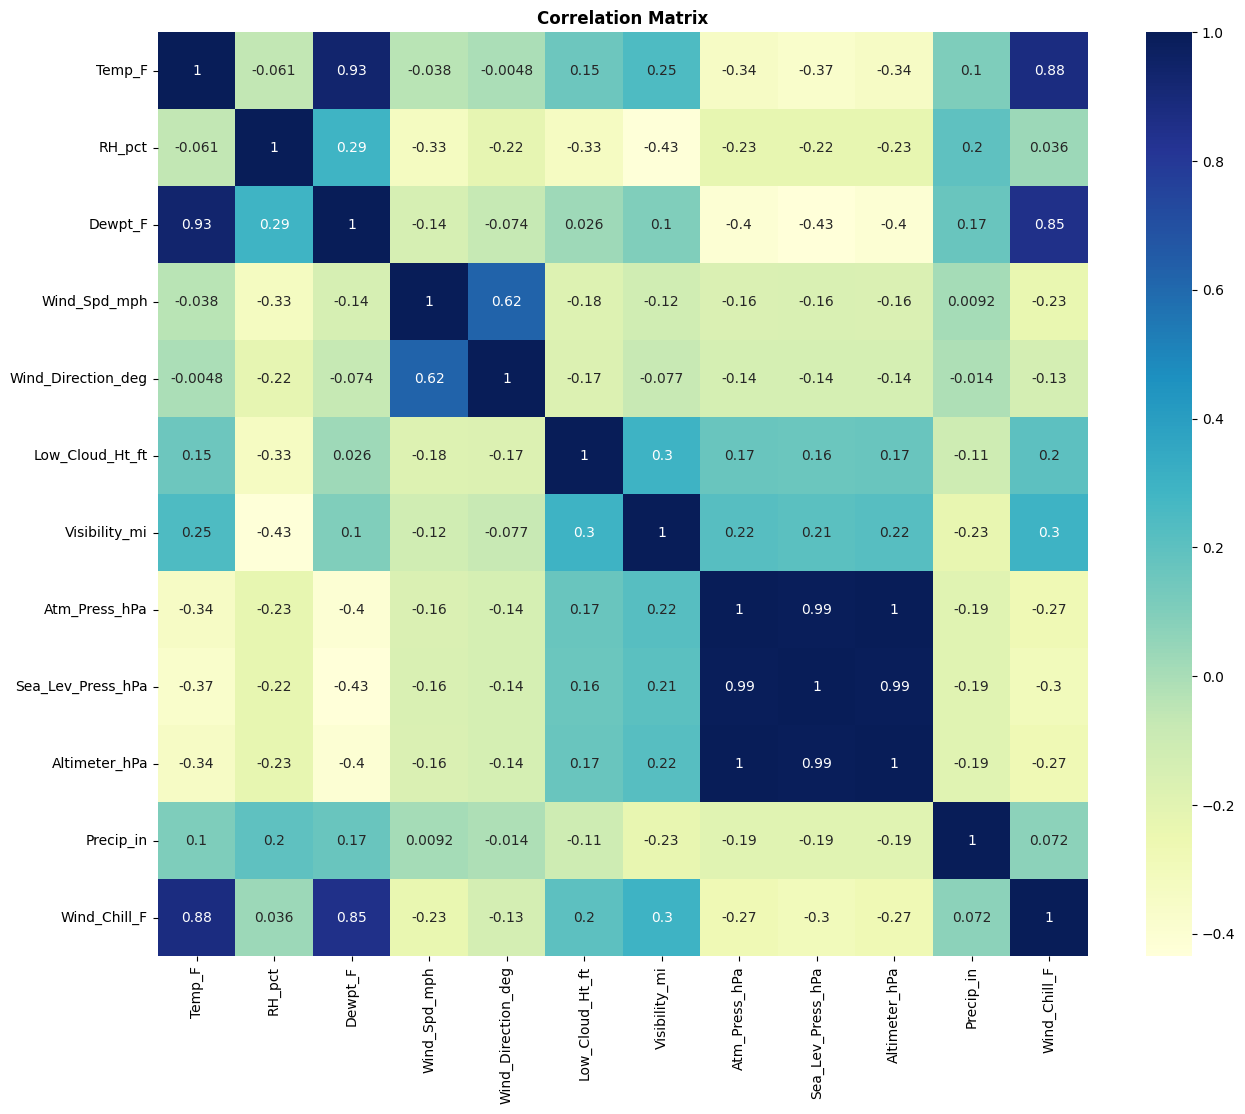

In [21]:
# Lets Compute the Pearson Correlation among the features
correlation_matrix = les.iloc[:, 5:].corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Plot the Heatmap 
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

`Note:`

**One of each feature represents other, so we can the drop other features from highly correlated features**

* (Dewpt_F, Temp_F) are highly correlated --> Temperature is an important feature, so lets drop Dewpt_F column
* (Altimeter_hpa, Atm_press_hpa, Sea_Lev_Press_hPa) are highly correlated --> Lets keep the Atm_Press_hpa and drop others
* (Temp_F, Wind_chill_F) are highly correlated
* (Wind_Spd_mph, Wind_Direction_deg) are highly correlated --> drop Wind_Direction_deg 

In [22]:
drop_feats = ['Altimeter_hPa', 'Sea_Lev_Press_hPa', 'Dewpt_F', 'Wind_Chill_F']

# drop the correlated features
les.drop(drop_feats, axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

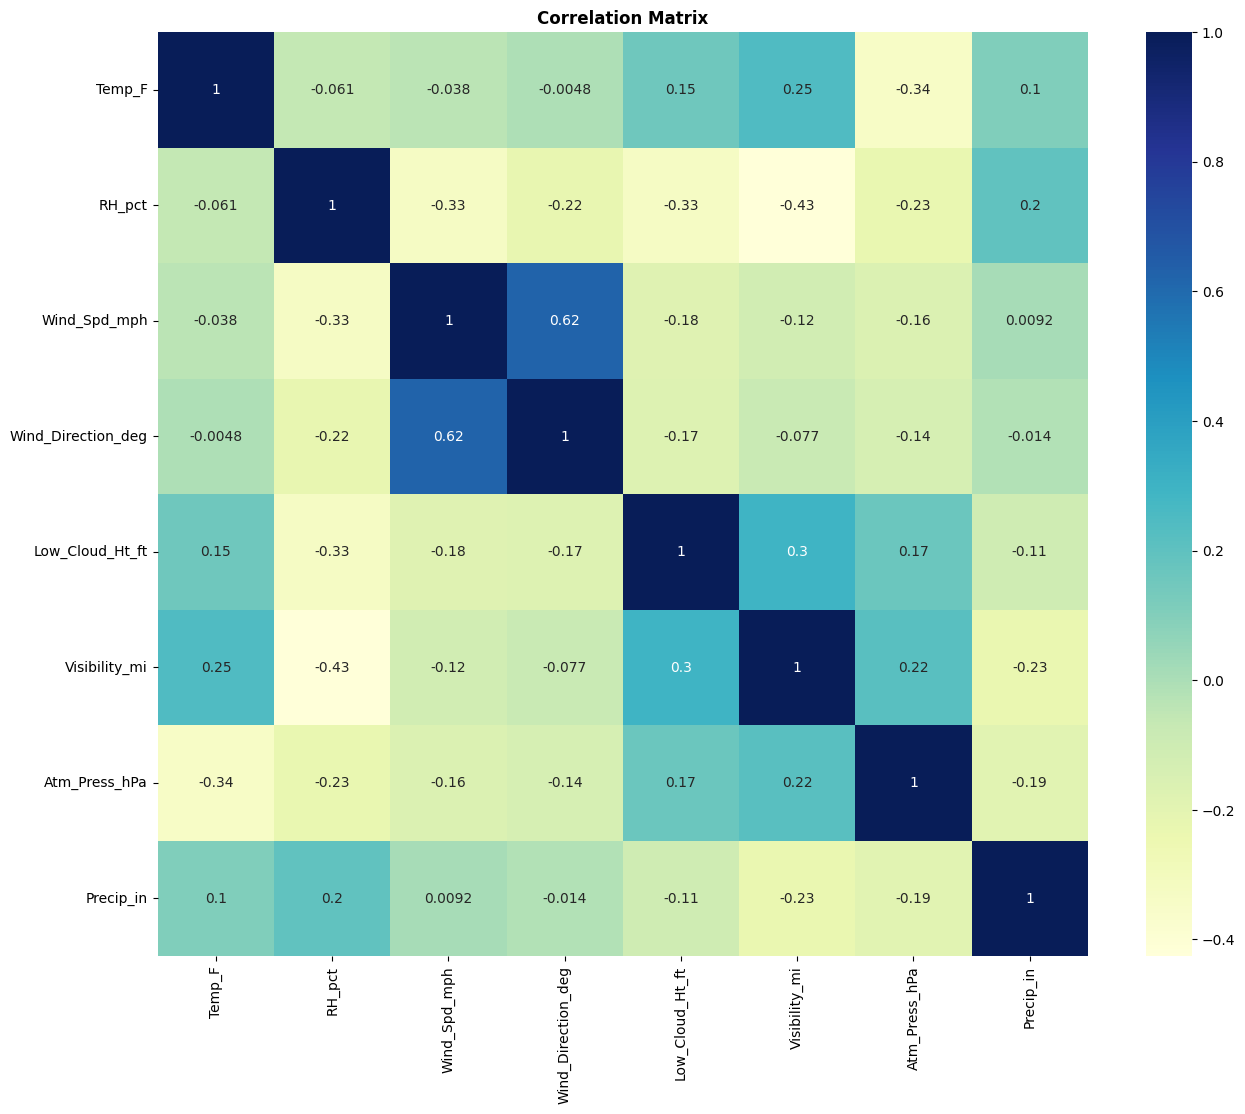

In [23]:
# Lets Compute the Pearson Correlation among the features
correlation_matrix = les.iloc[:, 5:].corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Plot the Heatmap 
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

* Wind-Direction & Wind-Speed are higly correlated as expected

*Wind-Direction doesn't matter, if there is No-Wind,  - so, lets create a wind-vector (Wx, Wy) - which considers both direction and speed ==> Wind-Direction + Wind-Speed - this will be easier for the model to interpret*

In [24]:
# Multiple wind_speed * Wind_Direction_in_rads along with cos & sine signals
les['Wind_x'] = (les['Wind_Spd_mph']) * np.cos(les['Wind_Direction_deg'] * np.pi / 180)
les['Wind_y'] = (les['Wind_Spd_mph']) * np.sin(les['Wind_Direction_deg'] * np.pi / 180)

les.head(2)

,Date_UTC,Time_UTC,datetime,year_month,Lake_data_1D,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Precip_in,Wind_x,Wind_y
0,2014-10-01,00:00,2014-10-01 00:00:00,2014-10-01,"[0.0025, 0.0025, 0.0025, 0.005, 0.0025, 0.0, 0...",48.0,93.0,11,330,800,4,992.7,0.05,9.526279,-5.500000
1,2014-10-01,01:00,2014-10-01 01:00:00,2014-10-01,"[0.0, 0.0, nan, nan, nan, 0.0025, nan, 0.0, 0....",48.0,93.0,9,340,800,4,993.3,0.05,8.457234,-3.078181


Distribution of Wind Data looks like:

Text(0, 0.5, 'Wind Velocity [m/h]')

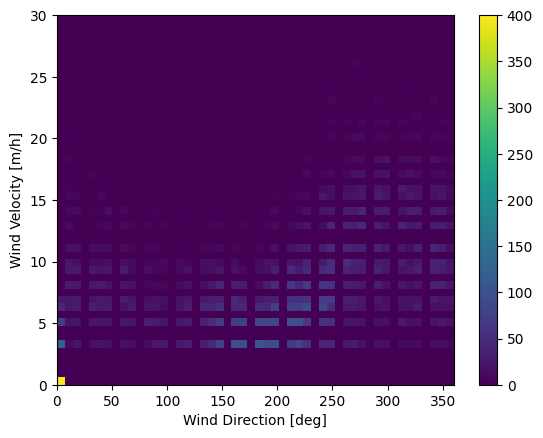

In [25]:
plt.hist2d(les['Wind_Direction_deg'], les['Wind_Spd_mph'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/h]')

Here is the distribution of Wind-Vectors ==> Wind_Direction + Wind_Speed

(-20.673237657289985, 25.0, -30.0, 18.79385241571817)

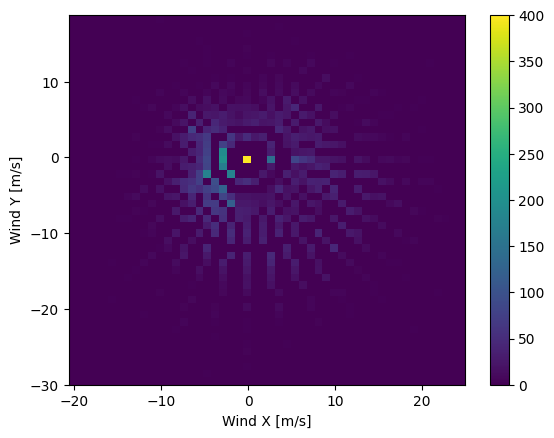

In [26]:
plt.hist2d(les['Wind_x'], les['Wind_y'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

### Cyclic Features

*Similarly, the `Date Time` column is very useful, but not in this string form. Lets Convert it to frequency signals using Cos & Sine signals*

In [27]:
les['ts'] = les['datetime'].map(pd.Timestamp.timestamp)

# Convert the Timestamp into Cos-Sin signals - by Day & Year
day = 24*60*60
year = (365.2425)*day

les['day_sin'] = np.sin(les['ts'] * (2 * np.pi / day))
les['day_cos'] = np.cos(les['ts'] * (2 * np.pi / day))
les['year_sin'] = np.sin(les['ts'] * (2 * np.pi / year))
les['year_cos'] = np.cos(les['ts'] * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

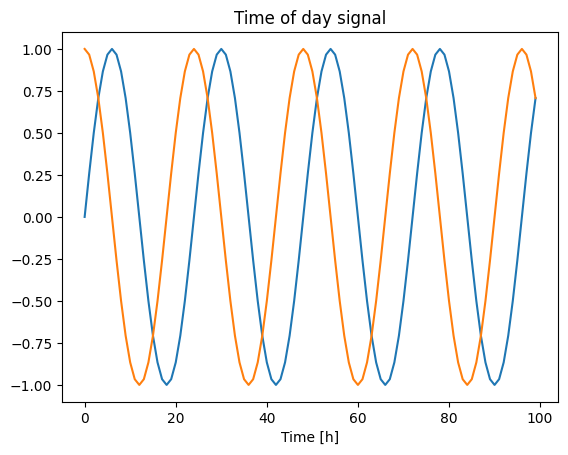

In [28]:
plt.plot(np.array(les['day_sin'])[:100])
plt.plot(np.array(les['day_cos'])[:100])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of Year signal')

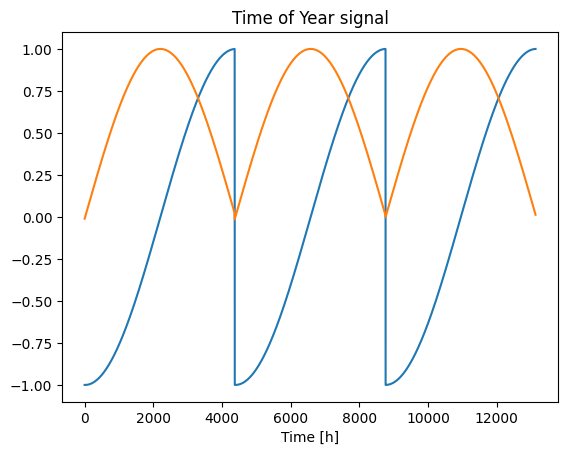

In [29]:
plt.plot(np.array(les['year_sin']))
plt.plot(np.array(les['year_cos']))
plt.xlabel('Time [h]')
plt.title('Time of Year signal')

* Lets drop Wind-Speed & Wind-Direction features and other Timestamps

In [30]:
feats_to_drop = ['Wind_Spd_mph', 'Wind_Direction_deg', 'ts']
les['year_month'] = les['datetime'].dt.strftime('%Y-%m')

les = les.drop(feats_to_drop, axis=1)
les.head()

,Date_UTC,Time_UTC,datetime,year_month,Lake_data_1D,Temp_F,RH_pct,Low_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Precip_in,Wind_x,Wind_y,day_sin,day_cos,year_sin,year_cos
0,2014-10-01,00:00,2014-10-01 00:00:00,2014-10,"[0.0025, 0.0025, 0.0025, 0.005, 0.0025, 0.0, 0...",48.0,93.0,800,4,992.7,0.05,9.526279,-5.500000e+00,-1.331485e-12,1.000000,-0.999946,-0.010354
1,2014-10-01,01:00,2014-10-01 01:00:00,2014-10,"[0.0, 0.0, nan, nan, nan, 0.0025, nan, 0.0, 0....",48.0,93.0,800,4,993.3,0.05,8.457234,-3.078181e+00,2.588190e-01,0.965926,-0.999954,-0.009637
2,2014-10-01,02:00,2014-10-01 02:00:00,2014-10,"[nan, nan, 0.0, 0.0025, 0.005, 0.0, nan, nan, ...",49.0,89.0,600,6,993.0,0.04,8.000000,-1.959435e-15,5.000000e-01,0.866025,-0.999960,-0.008920
3,2014-10-01,03:00,2014-10-01 03:00:00,2014-10,"[nan, 0.0, nan, nan, nan, nan, 0.005, 0.0025, ...",48.0,87.0,1200,8,993.0,0.01,8.660254,5.000000e+00,7.071068e-01,0.707107,-0.999966,-0.008203
4,2014-10-01,04:00,2014-10-01 04:00:00,2014-10,"[0.0025, nan, 0.0025, 0.0, nan, 0.0, nan, 0.0,...",48.0,86.0,1000,10,993.7,0.00,5.142301,6.128356e+00,8.660254e-01,0.500000,-0.999972,-0.007487


## Cloud Image Processing:
* Lets consider the Cloud images during the day-time from **14:00 to 21:00 UTC**

In [31]:
filtered_les = les[(les['Time_UTC'] >= '14:00') & (les['Time_UTC'] <= '21:00')].reset_index(drop=True)
print(f"Shape of the dataset: {filtered_les.shape}")
filtered_les.head()

Shape of the dataset: (4376, 17)


,Date_UTC,Time_UTC,datetime,year_month,Lake_data_1D,Temp_F,RH_pct,Low_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Precip_in,Wind_x,Wind_y,day_sin,day_cos,year_sin,year_cos
0,2014-10-01,14:00,2014-10-01 14:00:00,2014-10,"[0.21, 0.22, 0.19999999, 0.19, 0.1875, 0.185, ...",68.0,54.0,3400,10,991.7,0.0,-6.427876,7.660444e+00,-0.500000,-8.660254e-01,-1.000000,-0.000319
1,2014-10-01,15:00,2014-10-01 15:00:00,2014-10,"[0.17999999, 0.175, 0.1775, 0.1725, 0.1575, 0....",67.0,54.0,3700,10,991.7,0.0,-6.128356,5.142301e+00,-0.707107,-7.071068e-01,-1.000000,0.000398
2,2014-10-01,16:00,2014-10-01 16:00:00,2014-10,"[0.17999999, 0.1725, 0.1725, 0.16499999, 0.155...",64.0,64.0,3300,10,991.3,0.0,-6.000000,7.347881e-16,-0.866025,-5.000000e-01,-0.999999,0.001115
3,2014-10-01,17:00,2014-10-01 17:00:00,2014-10,"[0.185, 0.1775, 0.185, 0.17999999, 0.1775, 0.1...",64.0,62.0,3700,10,991.3,0.0,-5.000000,6.123234e-16,-0.965926,-2.588190e-01,-0.999998,0.001831
4,2014-10-01,18:00,2014-10-01 18:00:00,2014-10,"[0.24749999, 0.255, 0.24, 0.2325, 0.2175, 0.19...",59.0,74.0,8000,10,992.0,0.0,-1.928363,-2.298133e+00,-1.000000,-9.021517e-12,-0.999997,0.002548


In [32]:
# Load lat-long data 
lat_long_df = pd.read_csv("../../artifacts/data/lat_long_1D_labels_for_plotting.csv")

# Create seperate list for lat and long
lat_lst = lat_long_df['latitude'].to_list()
lon_lst = lat_long_df['longitude'].to_list()

lat_long_df.head()

,latitude,longitude
0,41.78,-87.54
1,41.78,-87.50
2,41.78,-87.46
3,41.78,-87.42
4,41.78,-87.38


### Pre-process Lake 1D data:
* **Few values in Lake 1D data are null, so lets fill them with 0s**

In [33]:
from tqdm import tqdm
import ast

# Remove the colormap and axis to clean images
def arrays_2_png_data(lat, lon, val, fig_name):
    status_code = -1

    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        plt.savefig(f'../../artifacts/lake_michigan_images/' + str(fig_name) +'.png')
        plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code


def arrays_2_png(lat, lon, val, fig_name):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        # plt.colorbar(orientation='vertical')
        # plt.savefig('../artifacts/lake_michigan_images/' + str(fig_name) + '.png')
        # plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code

# 1. Function to fill the missing values in the image pixels and save it as a png
def process_generate_image(df):
    for i, row in tqdm(df.iterrows()):
        try:
            # arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png(lat_lst, lon_lst, ast.literal_eval(df['Lake_data_1D'][i]), i)
        except: # If no data is available (fill with zeros)
            print("oopsie at row", str(i))

def rectify(crap_string):
    return [0.0 if el == 'nan' else float(el) for el in crap_string.strip('][').split(', ')]

#### 1. Combine Lat-Long data with Lake-1d-data and save the images

In [34]:
# # Clean and save the image with lat-long info --> use for first-time to process and save the images
# for i in tqdm(range(filtered_les.shape[0])):
#     arrays_2_png_data(lat_lst, lon_lst, 
#                 rectify(filtered_les['Lake_data_1D'][i]), i)

#### 2. Let's create a mask that is all ones *over* lake Michigan, and all zeros over land:

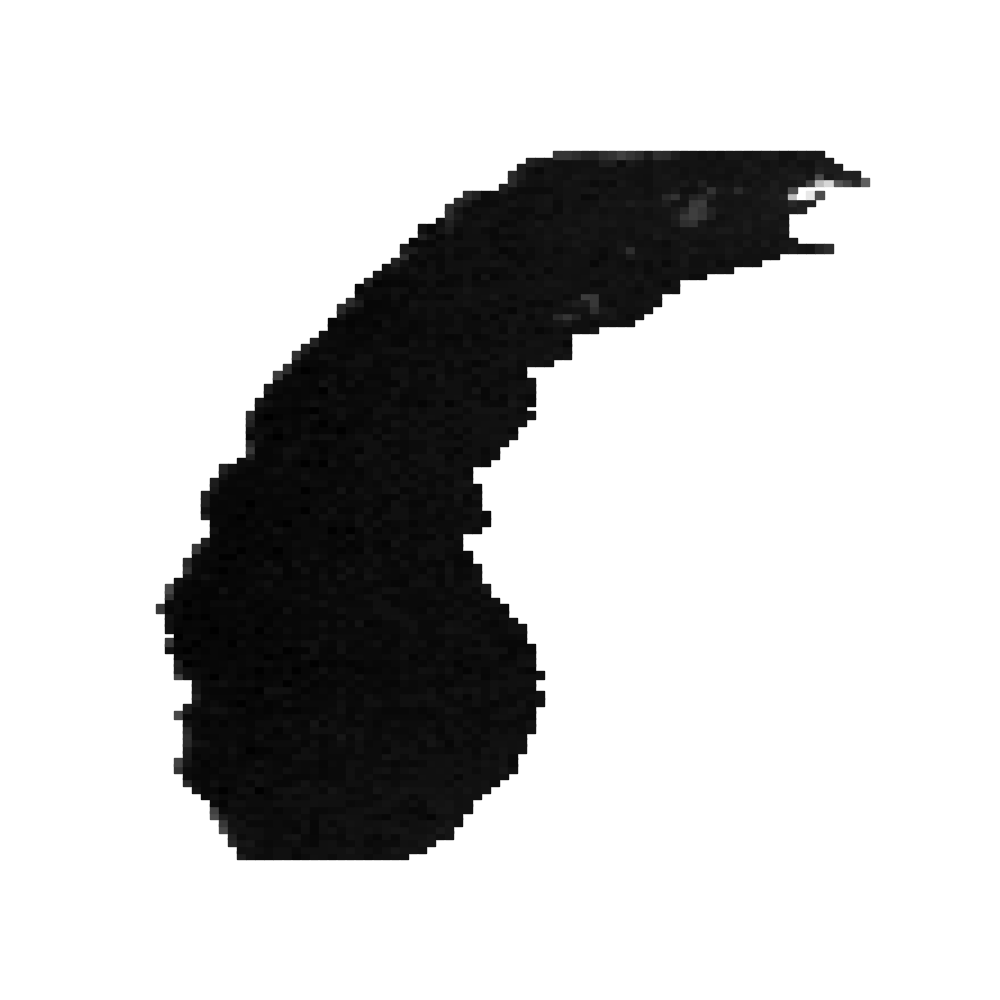

In [35]:
from PIL import Image, ImageOps
Image.open('../../artifacts/lake_michigan_images/199.png')

In [36]:
from PIL import Image, ImageOps

# sample image to create the mask
img = Image.open('../../artifacts/lake_michigan_images/199.png')
img = ImageOps.grayscale(img)
img = np.asarray(img)

# Create the mask
mask = (255 != img).astype(int)
np.nonzero(mask)

(array([150, 150, 150, ..., 860, 860, 860], dtype=int64),
 array([553, 554, 555, ..., 406, 407, 408], dtype=int64))

3. Apply the mask to the image to black-out the land --> resize --> save (**First-Time**)

In [37]:
# from PIL import Image, ImageOps
# f = '../../artifacts/lake_michigan_images'
# g = '../../artifacts/lake_michigan_images_resized'

# # Code to apply mask and resize the images
# for file in tqdm(os.listdir(f)):
#     f_img = f + "/" + file
#     g_img = g + "/" + file
#     img = Image.open(f_img)
#     img = ImageOps.grayscale(img)
#     newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
#     # newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.ANTIALIAS)
#     newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64))
#     newimg64.save(g_img)

## Cleaned Dataset Creation

### Now, all the images preprocessing is completed and ready for model training

* Load all the 64*64 images and crop 8 pixel border

In [38]:
from tqdm import tqdm
import cv2

images = []

# Load the 128, 128 images
g = '../../artifacts/lake_michigan_images_resized'

img_names = -1
for idx in tqdm(range(len(os.listdir(g)))):
    g_img = g + "/" + str(idx) + ".png"
    im = cv2.imread(g_img)
    # images.append(im)
    # Storing 1 channel, since the images are grayscale, and cropping
    images.append(im[8:-8,8:-8,0]) # Crop the 8 pixel border
    # images shape -> (35, 64, 64) 

  0%|          | 0/4376 [00:00<?, ?it/s]

100%|██████████| 4376/4376 [00:00<00:00, 11382.56it/s]


(<matplotlib.image.AxesImage at 0x242e5353160>, 80.64713541666667)

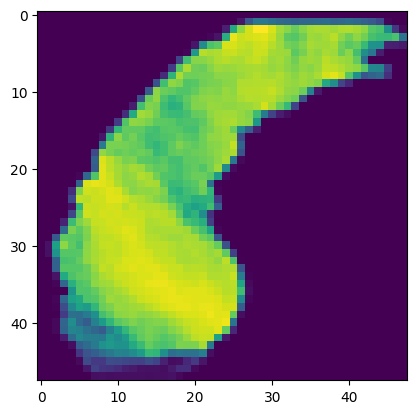

In [39]:
plt.imshow(images[0]), np.mean(images[0])

### Plot couple of images from 0th Index

Displaying next frames starting at image 0.


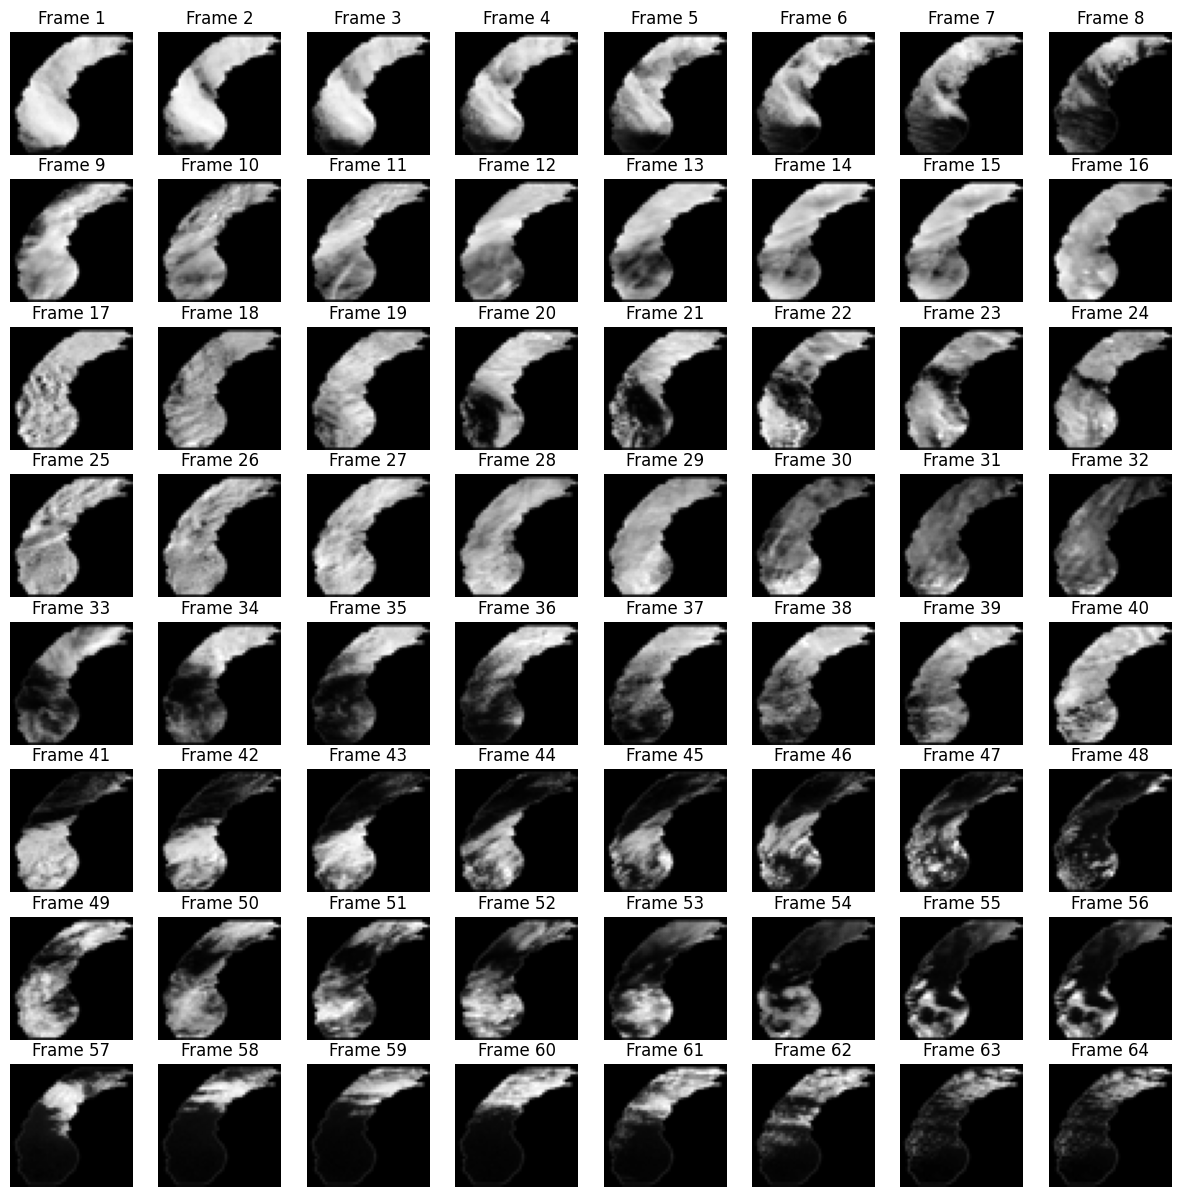

In [40]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(8, 8, figsize=(15, 15))

# Plot each of the sequential images for one random data example.
# data_choice = np.random.choice(range(len(images)), size=1)[0]
data_choice = 0 # Start from 0th index
for idx, ax in enumerate(axes.flat):
    ax.imshow(images[data_choice + idx], cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying next frames starting at image {data_choice}.")
plt.show()

In [41]:
image_labels = filtered_les.Precip_in.tolist()
print(f"Total number of Images: {len(images)} and Labels: {len(image_labels)}")

Total number of Images: 4376 and Labels: 4376


In [42]:
filtered_les.head()

,Date_UTC,Time_UTC,datetime,year_month,Lake_data_1D,Temp_F,RH_pct,Low_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Precip_in,Wind_x,Wind_y,day_sin,day_cos,year_sin,year_cos
0,2014-10-01,14:00,2014-10-01 14:00:00,2014-10,"[0.21, 0.22, 0.19999999, 0.19, 0.1875, 0.185, ...",68.0,54.0,3400,10,991.7,0.0,-6.427876,7.660444e+00,-0.500000,-8.660254e-01,-1.000000,-0.000319
1,2014-10-01,15:00,2014-10-01 15:00:00,2014-10,"[0.17999999, 0.175, 0.1775, 0.1725, 0.1575, 0....",67.0,54.0,3700,10,991.7,0.0,-6.128356,5.142301e+00,-0.707107,-7.071068e-01,-1.000000,0.000398
2,2014-10-01,16:00,2014-10-01 16:00:00,2014-10,"[0.17999999, 0.1725, 0.1725, 0.16499999, 0.155...",64.0,64.0,3300,10,991.3,0.0,-6.000000,7.347881e-16,-0.866025,-5.000000e-01,-0.999999,0.001115
3,2014-10-01,17:00,2014-10-01 17:00:00,2014-10,"[0.185, 0.1775, 0.185, 0.17999999, 0.1775, 0.1...",64.0,62.0,3700,10,991.3,0.0,-5.000000,6.123234e-16,-0.965926,-2.588190e-01,-0.999998,0.001831
4,2014-10-01,18:00,2014-10-01 18:00:00,2014-10,"[0.24749999, 0.255, 0.24, 0.2325, 0.2175, 0.19...",59.0,74.0,8000,10,992.0,0.0,-1.928363,-2.298133e+00,-1.000000,-9.021517e-12,-0.999997,0.002548


In [43]:
les.head()

,Date_UTC,Time_UTC,datetime,year_month,Lake_data_1D,Temp_F,RH_pct,Low_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Precip_in,Wind_x,Wind_y,day_sin,day_cos,year_sin,year_cos
0,2014-10-01,00:00,2014-10-01 00:00:00,2014-10,"[0.0025, 0.0025, 0.0025, 0.005, 0.0025, 0.0, 0...",48.0,93.0,800,4,992.7,0.05,9.526279,-5.500000e+00,-1.331485e-12,1.000000,-0.999946,-0.010354
1,2014-10-01,01:00,2014-10-01 01:00:00,2014-10,"[0.0, 0.0, nan, nan, nan, 0.0025, nan, 0.0, 0....",48.0,93.0,800,4,993.3,0.05,8.457234,-3.078181e+00,2.588190e-01,0.965926,-0.999954,-0.009637
2,2014-10-01,02:00,2014-10-01 02:00:00,2014-10,"[nan, nan, 0.0, 0.0025, 0.005, 0.0, nan, nan, ...",49.0,89.0,600,6,993.0,0.04,8.000000,-1.959435e-15,5.000000e-01,0.866025,-0.999960,-0.008920
3,2014-10-01,03:00,2014-10-01 03:00:00,2014-10,"[nan, 0.0, nan, nan, nan, nan, 0.005, 0.0025, ...",48.0,87.0,1200,8,993.0,0.01,8.660254,5.000000e+00,7.071068e-01,0.707107,-0.999966,-0.008203
4,2014-10-01,04:00,2014-10-01 04:00:00,2014-10,"[0.0025, nan, 0.0025, 0.0, nan, 0.0, nan, 0.0,...",48.0,86.0,1000,10,993.7,0.00,5.142301,6.128356e+00,8.660254e-01,0.500000,-0.999972,-0.007487


*Save the Preprocessed dataframe after reordering the features*

In [48]:
features_reorder = ['Date_UTC', 'Time_UTC', 'datetime', 'year_month', 'day_sin', 'day_cos',
       'year_sin', 'year_cos', 'Wind_x', 'Wind_y',
       'Temp_F', 'RH_pct', 'Low_Cloud_Ht_ft', 'Visibility_mi', 'Atm_Press_hPa',
       'Precip_in']

les_reordered = les[features_reorder].copy()
les_reordered.to_csv("../../artifacts/data/recent_18_months_les_data_preprocessed_422.csv", index=False)

### Data Preprocessing and Cloud-Image Processing are Completed!!
* From hereon, we use the above cleaned and processed dataset for further `Analysis and Modelling`